In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load train and test data

In [20]:
from proj1_helpers import *
from data_helpers import *
from implementations import ridge_regression
from cost import compute_loss


### Load train and test data

In [23]:
# Data paths
DATA_TRAIN_PATH = 'data/train.csv'

# Load data
Y, X, id_train = load_csv_data(DATA_TRAIN_PATH)

### Get index for the three different jet groups

In [24]:
jet_train_samples = get_jet_samples(X)

### Define parameters

In [25]:
degrees = range(1,20)
lambda_test = 1e-3
lambdas = np.logspace(-8,-2,7)
k_fold = 4
seed = 2
degrees, lambdas

(range(1, 20), array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02]))

## Group 1

In [26]:
# get train and test data
train_index = jet_train_samples[1]
x, y = X[train_index], Y[train_index]

### Best degree

In [27]:
acc_training = []
acc_validation = []

for degree in degrees:
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_test)
            
            acc_tr = predict_accuracy(y_train, x_train_aug, w)
            acc_val = predict_accuracy(y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(degree, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

/Users/Sofia/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


1 71.0736270160597 70.99711131744559
2 75.60825681763473 75.57902610131023
3 76.59479349358644 76.52042711234913
4 77.67933904192029 77.6359228309089
5 78.1070531999037 78.03440627256782
6 78.49736923553078 78.3903332301661
7 79.28101035111249 79.22856700711854
8 79.99243440283365 79.91591870421954
9 80.31655146325527 80.14804498091407
10 80.31311255545239 80.1325698958011
11 80.46055572750095 80.30666460332199
12 80.63551016197255 80.46657381615599
13 74.60710478352075 74.6737336222016
14 76.1606313834726 75.9813783142474
15 80.36684548987242 80.04874651810584
16 76.54621892087073 76.45594759104509
17 78.47329688091062 78.27298050139275
18 77.82119398878916 77.67203136283916
19 79.6365074452354 79.50840812957804


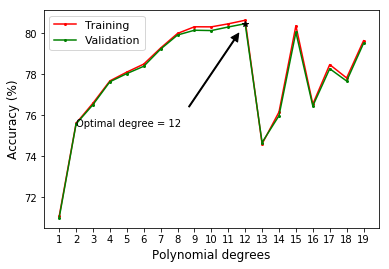

In [28]:
max_accuracy = np.amax(acc_validation)
best_degree = degrees[np.argmax(acc_validation)]

fig,ax = plt.subplots(1,1)

plt.plot(degrees, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.plot(degrees, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
ax.annotate('Optimal degree = %d' %(best_degree), xy=(best_degree, max_accuracy), xytext=(best_degree-10, max_accuracy-5),
            arrowprops=dict(facecolor='black',width=1,headwidth=8,headlength=8,shrink=0.1))
plt.plot(best_degree, max_accuracy, marker = '*', markersize=6, color = "black")
plt.xticks(degrees)
plt.xlabel("Polynomial degrees", fontsize = 12)
plt.ylabel("Accuracy (%)",  fontsize = 12)
#plt.title("Cross validation for Group 0")
plt.legend(fontsize=11)
plt.savefig("degree_group1.eps")
plt.show()

### Best lambda

In [29]:
acc_training = []
acc_validation = []

for ind_lambda,lambda_ in enumerate(lambdas):
        acc_tr_tmp = []
        acc_val_tmp = []
        
        for k in range(k_fold):
            x_train, y_train, x_val, y_val = cross_validation(y, x, k, k_fold, seed)
            x_tr_clean,_ = clean_data(x_train)
            x_val_clean,_ = clean_data(x_val)
            x_train_aug, y_train = augment_data(x_tr_clean, y_train, best_degree)
            x_val_aug, y_val = augment_data(x_val_clean, y_val, best_degree)
            w,_ = ridge_regression (y_train, x_train_aug, lambda_)
            
            acc_tr = predict_accuracy(y_train, x_train_aug, w)
            acc_val = predict_accuracy(y_val, x_val_aug, w)
            
            acc_tr_tmp.append(acc_tr)
            acc_val_tmp.append(acc_val)
            
        print(lambda_, np.mean(acc_tr_tmp), np.mean(acc_val_tmp))

        acc_training.append(np.mean(acc_tr_tmp))
        acc_validation.append(np.mean(acc_val_tmp))

/Users/Sofia/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


1e-08 80.61401698820455 80.41499019911276
1e-07 80.63594002544792 80.4059630661302
1e-06 80.62347398466248 80.39435675229547
1e-05 80.37372330547818 80.1519137521923
0.0001 80.63551016197255 80.40080470442588
0.001 80.63551016197255 80.46657381615599
0.01 80.2546511228034 80.08227586918395


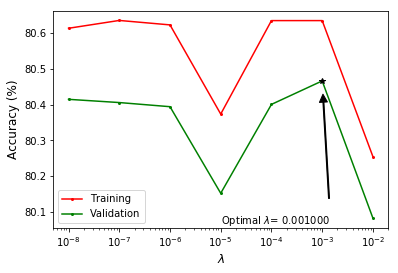

In [35]:
max_accuracy = np.amax(acc_validation)
best_lambda = lambdas[np.argmax(acc_validation)]

plt.semilogx(lambdas, acc_training, label='Training', marker = "o", markersize = 2, color = "red")
plt.semilogx(lambdas, acc_validation, label='Validation', marker = "o", markersize = 2, color = "green")
plt.semilogx(best_lambda, max_accuracy, marker = '*', markersize=6, color = "black")
plt.annotate('Optimal $\lambda$= %f' %(best_lambda), xy=(best_lambda, max_accuracy), xytext=(best_lambda *1e-2, max_accuracy-0.4),
            arrowprops=dict(facecolor='black',width=1,headwidth=8,headlength=8,shrink=0.1))
plt.xlabel("$\lambda$", fontsize = 12)
plt.ylabel("Accuracy (%)", fontsize = 12)
#plt.title("Cross validation for Group 0")
plt.legend()
plt.savefig("lambda_group1.eps")
plt.show()